In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Transformations of Data and Exploratory Data Analysis
#### In this notebook, we will try some methods for data transformation. Prior to transforming data, we must thoroughly explore the dataset. This process is often called Exploratory Data Analysis.

### About the data

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe someone can find a trend or give a prediction? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should I buy a 2 bedroom unit?

Content & Acknowledgements
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

### Some Key Details

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

#### Note: Data can be accessed form this repo (it's already downloaded in the data folder)

In [18]:
data = pd.read_csv('./data/melb_data.csv')
data.head(8)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


#### Find out what columns, and what datatype each column has

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### Since we cannot see all the columns using .head(), we can increase the limit to show all of them

In [20]:
pd.set_option('display.max_columns',100)

In [21]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [22]:
data.sample(8)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9045,Brighton,2/149 Carpenter St,3,u,1336000.0,S,hockingstuart,3/06/2017,10.5,3186.0,3.0,2.0,1.0,249.0,NaN,NaN,Bayside,-37.90597,145.00208,Southern Metropolitan,10579.0
5767,St Kilda,1/76 Carlisle St,2,u,430000.0,S,Woodards,3/12/2016,6.1,3182.0,2.0,1.0,1.0,0.0,71.0,1970.0,Port Phillip,-37.86750,144.98510,Southern Metropolitan,13240.0
249,Armadale,25 Llaneast St,4,h,2200000.0,PI,Jellis,15/10/2016,6.3,3143.0,4.0,1.0,2.0,495.0,163.0,1900.0,Stonnington,-37.86130,145.02640,Southern Metropolitan,4836.0
3046,Hampton,18 Kingston St,4,h,2400000.0,PI,Nick,12/11/2016,13.7,3188.0,4.0,2.0,2.0,663.0,NaN,NaN,Bayside,-37.93230,145.01370,Southern Metropolitan,5454.0
2694,Footscray,9/6 Rosamond Rd,2,t,410000.0,SP,Rendina,15/10/2016,6.4,3011.0,2.0,2.0,1.0,65.0,80.0,2014.0,Maribyrnong,-37.78810,144.88380,Western Metropolitan,7570.0
2176,Doncaster,3/6 Hepburn Rd,3,u,800000.0,PI,Barry,22/08/2016,13.9,3108.0,3.0,2.0,2.0,267.0,NaN,1991.0,Manningham,-37.78820,145.13150,Eastern Metropolitan,9028.0
9488,Clayton South,20 Botanic Dr,3,h,745000.0,S,Barry,17/06/2017,17.5,3169.0,3.0,2.0,2.0,180.0,134.0,NaN,Kingston,-37.93898,145.13648,South-Eastern Metropolitan,4734.0
9142,Essendon,1/143 Bradshaw St,2,u,762000.0,S,Brad,3/06/2017,7.5,3040.0,2.0,1.0,1.0,195.0,NaN,NaN,Moonee Valley,-37.74125,144.89502,Western Metropolitan,9264.0


## Numeric Features

#### Plot a histogram, for all numeric features

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

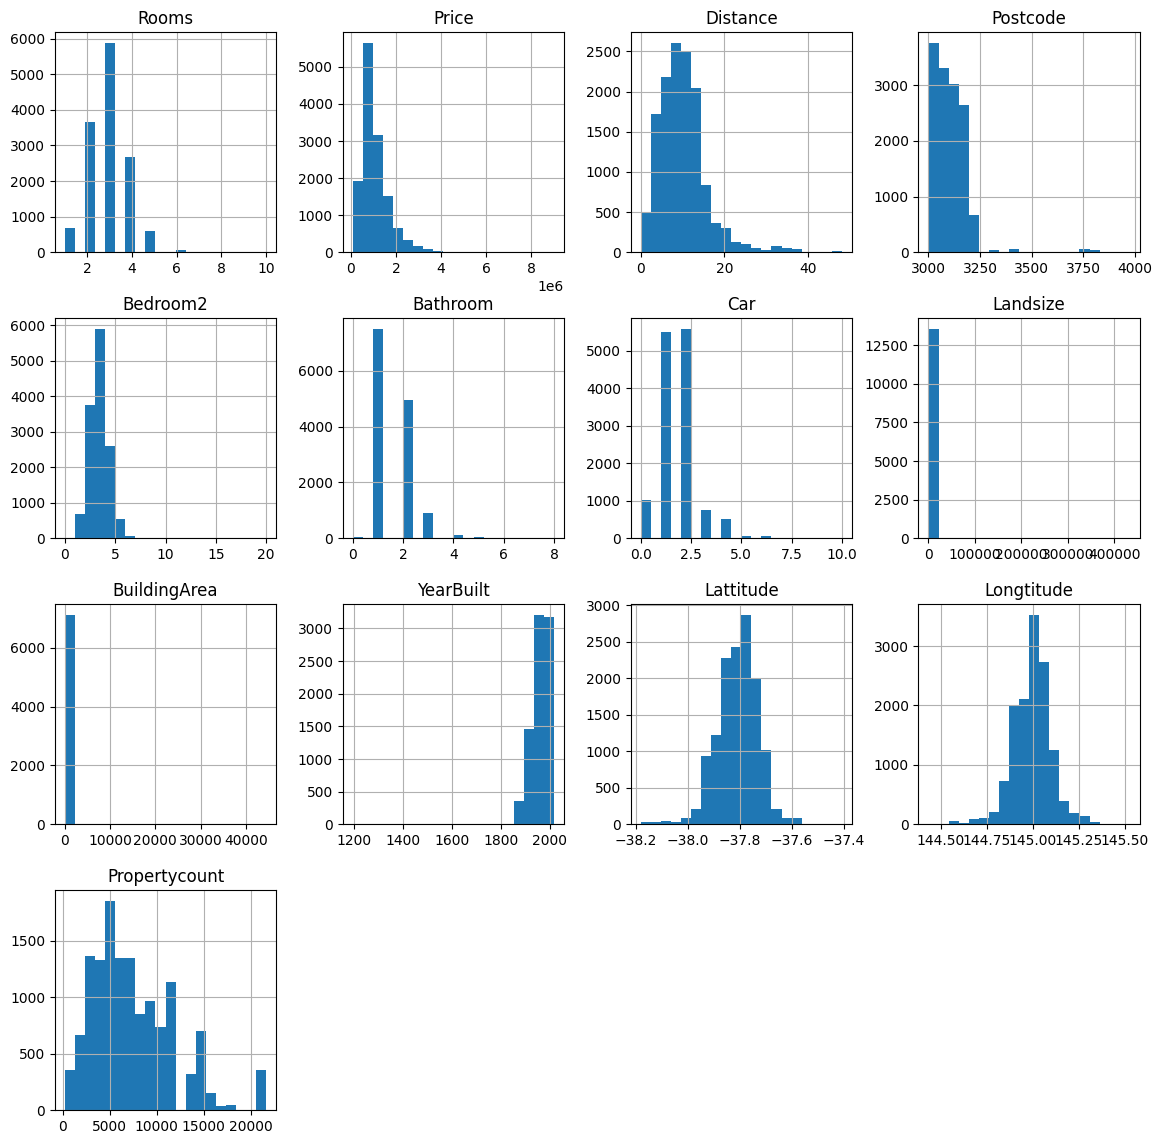

In [23]:
data.hist(bins = 20, figsize=(14,14))

#### Identify the outliers, see how the data is distributed, check in a high level for missing values

In [24]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### The code below can be used to find outliers by IQR method, which basically finds the substracts the q3 - q1 (quartile values) to get the range where the most data (captures the spread of the middle) relies on, and then from the third quartile we add this IQR and we multiply by 1.5 which can be changed, it's a parameter then can be changed.

Q1 is the first quartile of the data, which represents the value below which 25% of the observations fall.
Q3 is the third quartile of the data, which represents the value below which 75% of the observations fall.
IQR is the interquartile range, which is the range between Q1 and Q3.

The goal using IQR method is, to get the lower limit where the "normal" values are supposed to fit in which is : Q1 - IQR * 1.5 , and the upper limit util when the highest "normal" values are suppoesed to be in, which is Q3 + IQR * 1.5. Any value above this Q3 + IQR * 1.5 is considered an outlier.


In [25]:
# Q3 + IQR * 1.5 => Get the upper limit
upper_limit = data["Landsize"].quantile(0.75) + (data["Landsize"].quantile(0.75) - data["Landsize"].quantile(0.25)) * 1.5
upper_limit

outliers = data[data["Landsize"] > upper_limit]
outliers

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22,Abbotsford,138/56 Nicholson St,3,u,1090000.0,S,Jellis,18/03/2017,2.5,3067.0,3.0,2.0,2.0,4290.0,27.0,NaN,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
234,Armadale,526 Orrong Rd,4,h,3000000.0,VB,Jellis,4/06/2016,6.3,3143.0,4.0,2.0,2.0,1581.0,NaN,1934.0,Stonnington,-37.85800,145.01110,Southern Metropolitan,4836.0
236,Armadale,9/19 Mercer Rd,3,u,735000.0,PI,Marshall,7/05/2016,6.3,3143.0,3.0,2.0,1.0,2113.0,14.0,1970.0,Stonnington,-37.85430,145.02620,Southern Metropolitan,4836.0
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0
266,Armadale,10/51 Armadale St,2,u,710000.0,S,Jellis,25/02/2017,6.3,3143.0,2.0,1.0,1.0,2471.0,80.0,1970.0,Stonnington,-37.85730,145.01860,Southern Metropolitan,4836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13461,Keilor East,18 Heatherlea Cr,4,h,886000.0,S,Nelson,26/08/2017,11.7,3033.0,4.0,2.0,4.0,5750.0,NaN,NaN,NaN,-37.74800,144.85098,Western Metropolitan,5629.0
13483,Maribyrnong,88 The Esplanade,3,h,3400000.0,SP,Jas,26/08/2017,4.3,3032.0,3.0,1.0,5.0,2027.0,187.0,1964.0,NaN,-37.76570,144.89109,Western Metropolitan,4918.0
13487,Melton,21D Yuille St,5,h,710000.0,PI,Ryder,26/08/2017,31.7,3337.0,5.0,2.0,2.0,1670.0,280.0,2000.0,NaN,-37.67813,144.59292,Western Victoria,3600.0
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,26/08/2017,34.1,3793.0,4.0,2.0,2.0,1611.0,NaN,NaN,NaN,-37.87931,145.41288,Eastern Victoria,1424.0


## Categorical Features

In [10]:
data.describe(include='object')

# So this is self-explanatory, 
# the count is the number of not null values, 
# the unqiue is the unique values of Suburb, 
# top is the most frequent value
# freq is the number of times this most freq value occures

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [11]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


#### We can plot historgrams for categorical data 

<AxesSubplot:xlabel='count', ylabel='Regionname'>

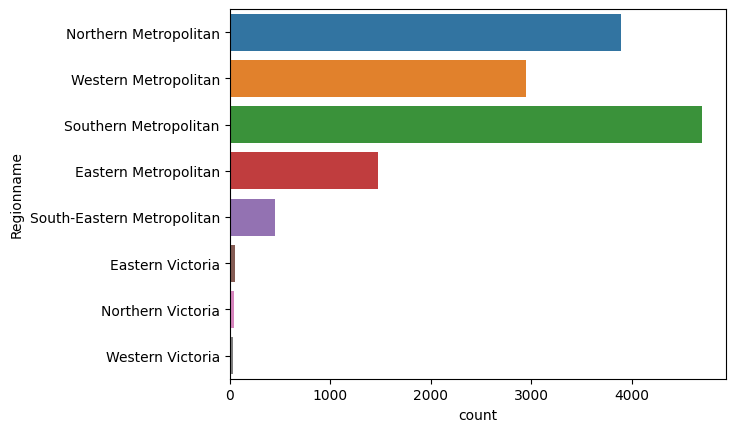

In [12]:
sns.countplot(y="Regionname",data=data)

<AxesSubplot:xlabel='count', ylabel='Method'>

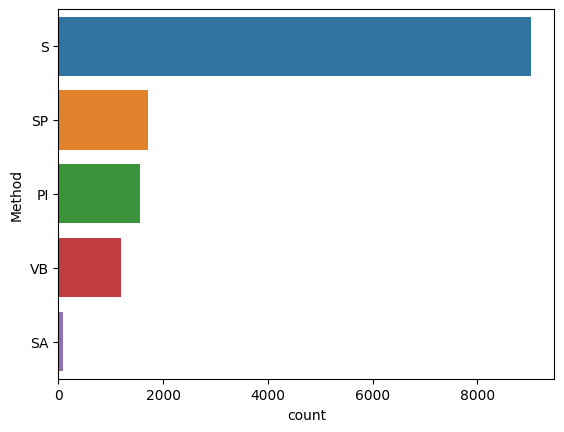

In [13]:
sns.countplot(y="Method",data=data)

<AxesSubplot:xlabel='count', ylabel='Type'>

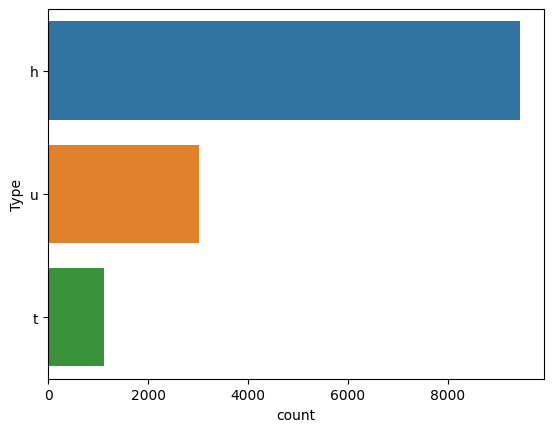

In [14]:
sns.countplot(y="Type",data=data)

<AxesSubplot:>

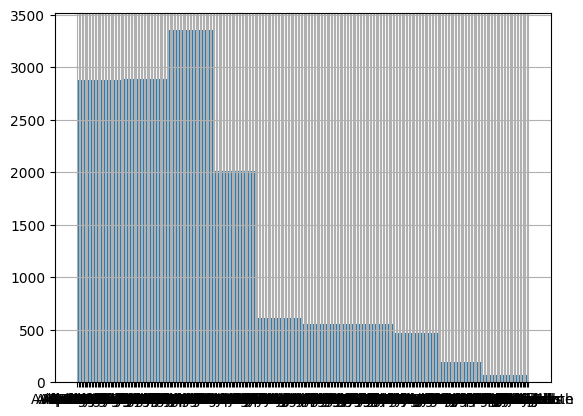

In [15]:
data['Suburb'].hist()

<AxesSubplot:xlabel='count', ylabel='Suburb'>

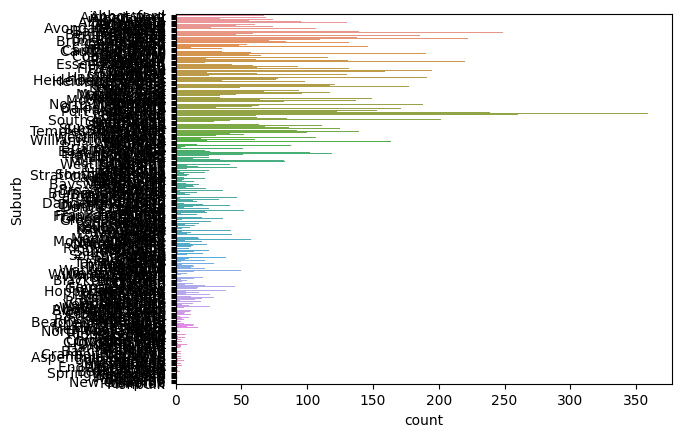

In [16]:
sns.countplot(y='Suburb',data=data)
# There are too many unique values that's why countplot is not the best way to show the distributuion of subburb

## Vizualization of data

#### This is how datapoints are spreaded using longitude and lattitude we can display it 

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

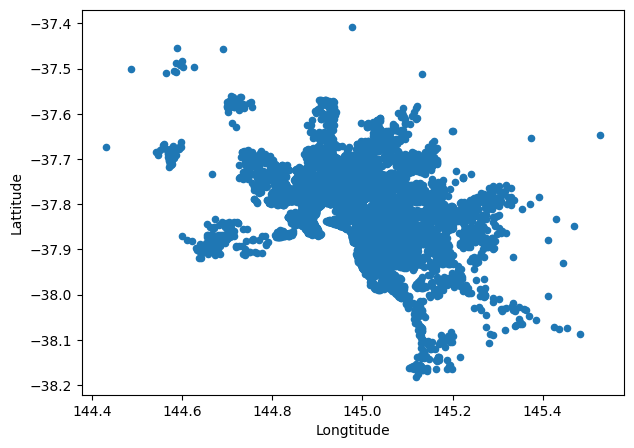

In [17]:
data.plot(kind='scatter', x="Longtitude", y="Lattitude",figsize=(7,5))

#### We can query the data and get the most expensive properties

<AxesSubplot:title={'center':'Property and Prices'}, xlabel='Longtitude', ylabel='Lattitude'>

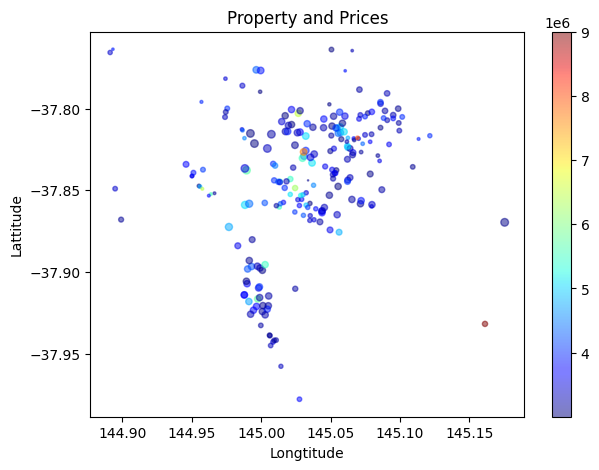

In [18]:
data_expensive = data[data["Price"]> 3000000]
data_expensive.plot(kind='scatter', x="Longtitude", y="Lattitude",figsize=(7,5), s=data_expensive['Propertycount'] / 500, alpha=0.5,
c=data_expensive['Price'], colormap='jet', colorbar=True, legend=True, title='Property and Prices')

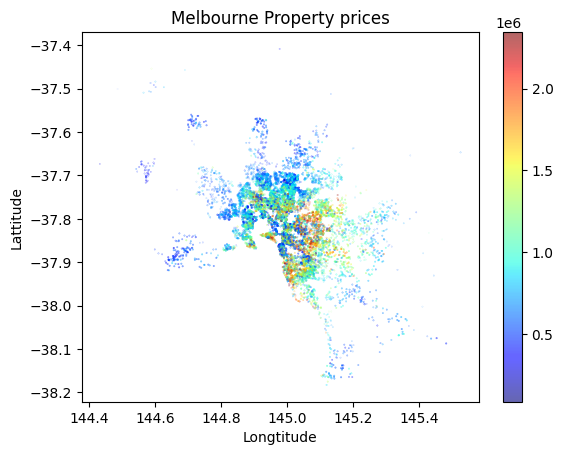

In [19]:
interquartile = interquartile=(data['Price'].quantile(q=0.75)-data['Price'].quantile(q=0.25))
least = data['Price'].quantile(q=0.25)-interquartile*1.5
most = data['Price'].quantile(q=0.75)+interquartile*1.5
idx = np.logical_and(data['Price'] < most, data['Price'] > least)
ax = data[idx].plot(kind='scatter',
            x="Longtitude", y="Lattitude",
            s=data['Propertycount'][idx]/100000,
            alpha=0.6,
            c=data['Price'][idx], colormap='jet', colorbar=True,
            legend=True,
            title="Melbourne Property prices")

#### We can use scatter matrix, to show the data and analyse if there are any outliers

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Price'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Price'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Price'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Price'>,
        <AxesSubplot:xlabel='Car', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Rooms'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Car', ylabel='Rooms'>],
       [<AxesSubplot:xlabel='Price', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Car', ylab

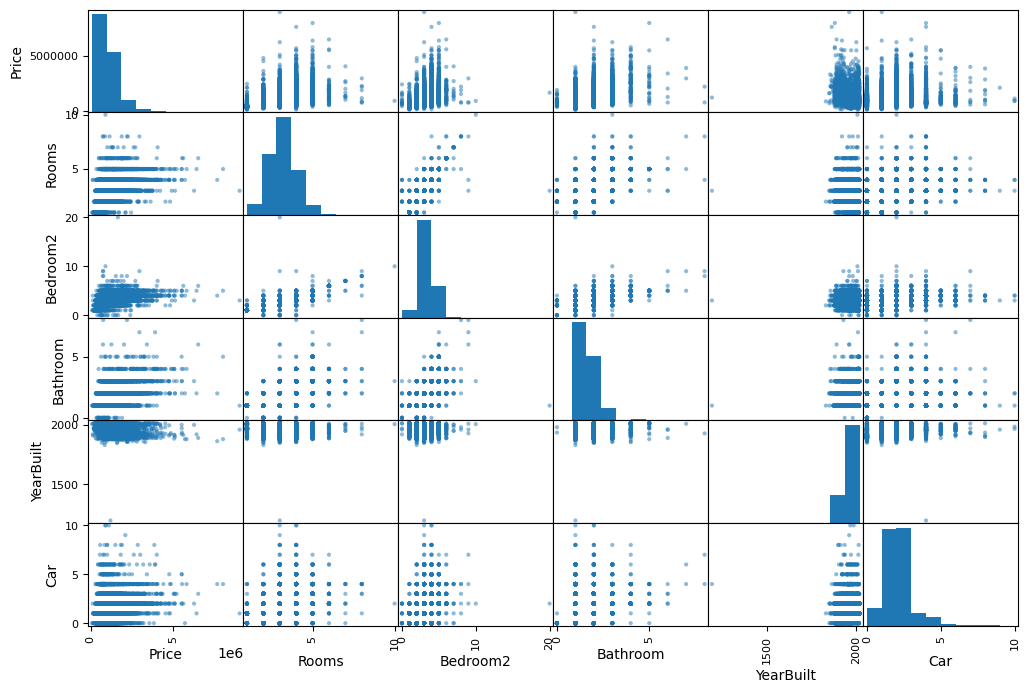

In [20]:
attributes = ["Price", "Rooms", "Bedroom2", "Bathroom", "YearBuilt","Car"]
pd.plotting.scatter_matrix(data[attributes], figsize=(12,8))

#### From the plots we can see that YearBuilt, contains outliers

#### we can change any value in the "YearBuilt" column that is less than 1850 to 1850

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Price'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Price'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Price'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Price'>,
        <AxesSubplot:xlabel='Car', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Rooms'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Rooms'>,
        <AxesSubplot:xlabel='Car', ylabel='Rooms'>],
       [<AxesSubplot:xlabel='Price', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Rooms', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Bedroom2', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Bathroom', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Bedroom2'>,
        <AxesSubplot:xlabel='Car', ylab

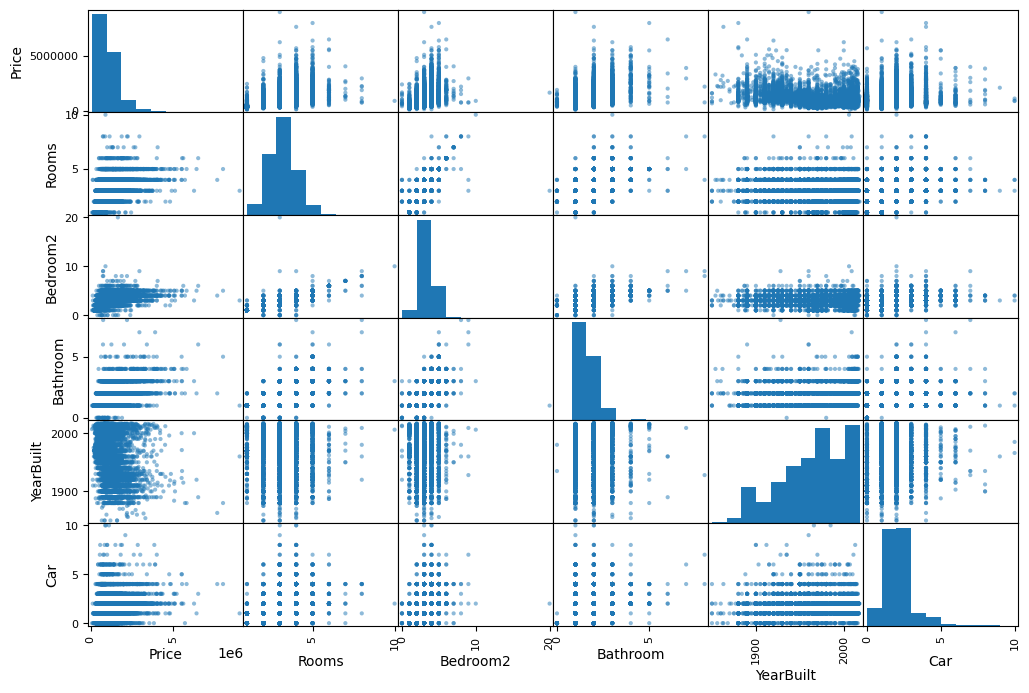

In [22]:
data1 = data.copy()
data1.loc[data1["YearBuilt"] < 1850,"YearBuilt"] = 1850

attributes = ["Price", "Rooms", "Bedroom2", "Bathroom", "YearBuilt","Car"]
pd.plotting.scatter_matrix(data1[attributes], figsize=(12,8))

## Data Cleaning and preparing for data mining

#### To split the input variables from target variables

In [23]:
real_estate = data.drop("Price",axis=1)
real_estate_price = data["Price"].copy()

#### Check for missing values

In [24]:
# the method .isnull() can be used
data_null_count = data.isnull().sum()

print(f"There are {data_null_count.sum()} missing values in the data")

# display columns with the counts of missing data
print(data_null_count)
# data.columns[data.isnull().sum() > 0]
data.columns[data_null_count > 0]

There are 13256 missing values in the data
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Index(['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')

#### Sklearn has a library has a class SimpleImputer that can fill missing numeric data by supplying mean, median, most frequent or constant value.

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

real_estate_num = real_estate.drop(columns=["Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname"],axis=1)
imputer.fit(real_estate_num)

SimpleImputer(strategy='median')

In [26]:
real_estate_num1 = imputer.transform(real_estate_num)
real_estate_num1

array([[ 2.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7799600e+01,  1.4499840e+02,  4.0190000e+03],
       [ 2.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7807900e+01,  1.4499340e+02,  4.0190000e+03],
       [ 3.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7809300e+01,  1.4499440e+02,  4.0190000e+03],
       ...,
       [ 3.0000000e+00,  6.8000000e+00,  3.0160000e+03, ...,
        -3.7852740e+01,  1.4488738e+02,  6.3800000e+03],
       [ 4.0000000e+00,  6.8000000e+00,  3.0160000e+03, ...,
        -3.7859080e+01,  1.4489299e+02,  6.3800000e+03],
       [ 4.0000000e+00,  6.3000000e+00,  3.0130000e+03, ...,
        -3.7811880e+01,  1.4488449e+02,  6.5430000e+03]])

#### Convert back to pandas dataframe

In [27]:
real_estate_num1_df = pd.DataFrame(real_estate_num1, index=real_estate_num.index)

In [28]:
real_estate_num1_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.0,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,1970.0,-37.79960,144.99840,4019.0
1,2.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3.0,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,1970.0,-37.79690,144.99690,4019.0
4,4.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4.0,16.7,3150.0,4.0,2.0,2.0,652.0,126.0,1981.0,-37.90562,145.16761,7392.0
13576,3.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3.0,6.8,3016.0,3.0,2.0,4.0,436.0,126.0,1997.0,-37.85274,144.88738,6380.0
13578,4.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0
